In [1]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from z3 import *
from IPython.display import Markdown, display,HTML,Image
from matplotlib.colors import ListedColormap

### Puzzle as published 
https://www.janestreet.com/puzzles/knight-moves-index/

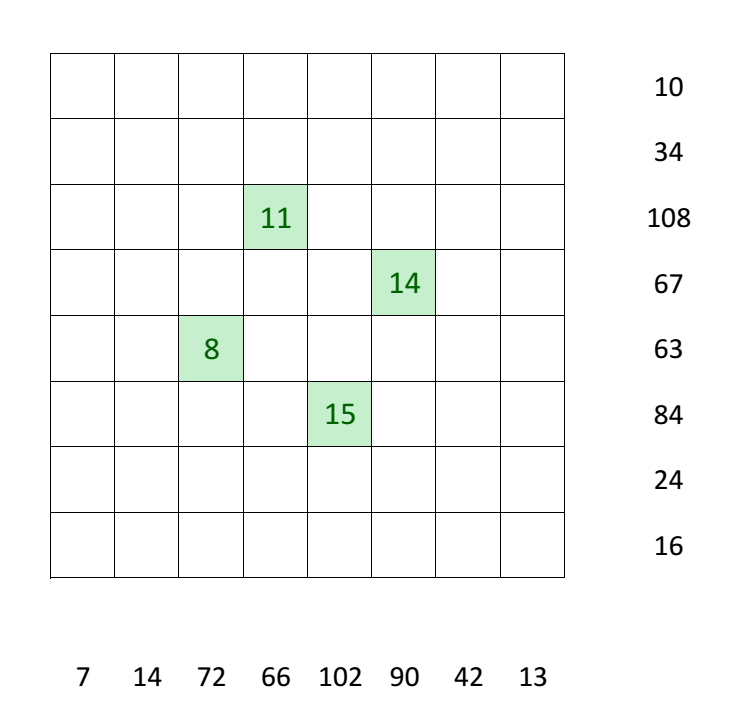

In [2]:
url='https://www.janestreet.com/puzzles/knight-moves-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Puzzle as published \n'+url))
display(Image('https://www.janestreet.com/puzzles/Mar16_puzzle.png',width=300))
HTML(str(soup.find_all('div', {'class' :'inner-wrapper'})[1]))

In [3]:
#Setup the constraints
# 28 filled cells so 7 in each quarter

bot_labels  =  np.array([7,14,72,66,102,90,42,13],dtype=int)
right_labels = np.array([10,34,108,67,63,84,24,16],dtype=int)
fixed = np.zeros((8,8))
fixed[2,3]=11;fixed[4,2]=8;fixed[3,5]=14;fixed[5,4]=15

In [43]:
def moves(i,j,N):
    moves=[(2, 1), (1, 2), (-1, 2), (-2, 1), (-2, -1), (-1, -2), (1, -2), (2, -1)]
    return [(i+x,j+y) for x,y in moves if i+x >=0 and i+x<N and j+y>=0 and j+y<N ]

def fill(fixed,row_tot,col_tot):
    start = time.time()
    N= 8
    s = Tactic("qffd").solver()
    X = np.array(IntVector('x', N*N),dtype=object).reshape((N,N))         
    s += [And(e >= 0  ,e <= 28) for (i,j),e in np.ndenumerate(X)]
    s += [X[i,j] == int(e) for (i,j),e in np.ndenumerate(fixed) if e !=0]
    s += [Or(e==0,e==1,PbEq([(X[k,l]==e-1,1) for k,l in moves(i,j,N)],1)) for (i,j),e in np.ndenumerate(X)] 
    s += [PbEq([(e==n,1) for (i,j),e in np.ndenumerate(X)],1) for n in range(1,29)]
    s += [np.sum(X[i,:])==int(e) for i,e in enumerate(col_tot)]
    s += [np.sum(X[:,i])==int(e) for i,e in enumerate(row_tot)]
    
    if s.check() == sat:
        m = s.model()
        eval = np.vectorize(lambda x:m.evaluate(x).as_long())
        x =  eval(X)
        sol = max([np.product(x[i,:][x[i,:]!=0]) for i in range(8)]+[np.product(x[:,i][x[:,i]!=0]) for i in range(8)])
        display(Markdown("Solution **{:,.0f}** took {:.4f} seconds".format(sol,time.time()-start)))
        pretty = np.vectorize(lambda x:(' '+str(int(x))).replace(' 0','').replace(' ',''))
        fig,ax = plt.subplots(1,1,figsize=(3,3))
        ax = sns.heatmap((fixed !=0)*1+(x!=0)*1,
                         annot=pretty(x),
                         fmt='',cbar=False,
                         cmap=ListedColormap(["w","orange","lime"]),linecolor='k',linewidth=2,
                         xticklabels=bot_labels, yticklabels=right_labels, annot_kws={"fontsize":10,"color":"k"},alpha=0.3)
        ax.tick_params(left=False, bottom=False,labelleft=False, labelright=True)
        plt.xticks(rotation=0,fontsize =10)
        plt.yticks(rotation=0,fontsize =10)
        plt.tight_layout()
        plt.show()
        return x
    else:
        print("{} failed in {:.4f} seconds".format(fix_y,time.time()-start))       

Solution **19,675,656** took 3.6971 seconds

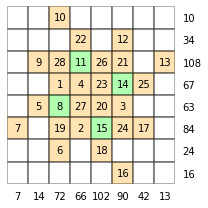

In [44]:
x = fill(fixed,bot_labels,right_labels)

### Puzzle as published 
https://www.janestreet.com/puzzles/knight-moves-solution/

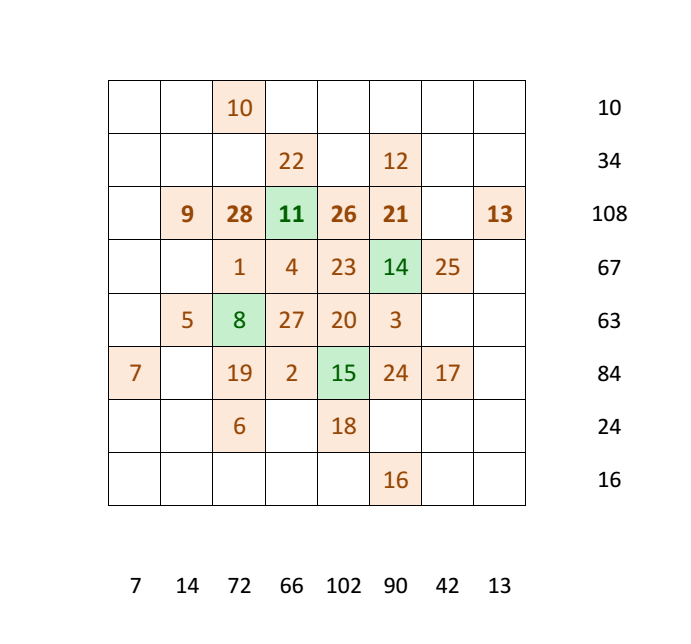

In [6]:
url='https://www.janestreet.com/puzzles/knight-moves-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Puzzle as published \n'+url))
display(Image('https://www.janestreet.com/puzzles/mar16_solution.png',width=300))
HTML(str(soup.find_all('div', {'class' :'inner-wrapper'})[1]))

<img src="https://www.janestreet.com/puzzles/mar16_solution.png" width="350" >

In [34]:
solution = np.array([[0 ,0 ,10,0 ,0 ,0 ,0 ,0 ],
                     [0 ,0 ,0 ,22,0 ,12,0 ,0 ],
                     [0 ,9 ,28,11,26,21,0 ,13],
                     [0 ,0 ,1 ,4 ,23,14,25,0 ],
                     [0 ,5 ,8 ,27,20,3 ,0 ,0 ],
                     [7 ,0 ,19,2 ,15,24,17,0 ],
                     [0 ,0 ,6 ,0 ,18,0 ,0 ,0 ],
                     [0 ,0 ,0 ,0 ,0 ,16,0 ,0 ]
                    ])


In [42]:
pretty = np.vectorize(lambda x:(' '+str(int(x))).replace(' 0','').replace(' ',''))
pretty(solution)

array([['', '', '10', '', '', '', '', ''],
       ['', '', '', '22', '', '12', '', ''],
       ['', '9', '28', '11', '26', '21', '', '13'],
       ['', '', '1', '4', '23', '14', '25', ''],
       ['', '5', '8', '27', '20', '3', '', ''],
       ['7', '', '19', '2', '15', '24', '17', ''],
       ['', '', '6', '', '18', '', '', ''],
       ['', '', '', '', '', '16', '', '']], dtype='<U2')